Importing packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import yfinance as yf

Download data for stock prediction

In [ ]:
ticker = 'AAPL'
data = yf.download(ticker, start='2010-01-01', end='2023-12-31')
data.head()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.454506,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.465666,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.362821,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.351055,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.393281,447610800


Preprocess the data

feature : moving averages

In [ ]:
data['MA5'] = data['Adj Close'].rolling(window=5).mean()
data['MA10'] = data['Adj Close'].rolling(window=10).mean()
data['MA20'] = data['Adj Close'].rolling(window=20).mean()
print(data['MA5'])
print("\n")
print(data['MA10'] )
print("\n")
print(data['MA20'])

Date
2010-01-04           NaN
2010-01-05           NaN
2010-01-06           NaN
2010-01-07           NaN
2010-01-08      6.405466
                 ...    
2023-12-22    194.450128
2023-12-26    193.884277
2023-12-27    193.129141
2023-12-28    192.880087
2023-12-29    192.451718
Name: MA5, Length: 3522, dtype: float64


Date
2010-01-04           NaN
2010-01-05           NaN
2010-01-06           NaN
2010-01-07           NaN
2010-01-08           NaN
                 ...    
2023-12-22    195.007018
2023-12-26    194.994069
2023-12-27    194.838657
2023-12-28    194.402312
2023-12-29    193.846422
Name: MA10, Length: 3522, dtype: float64


Date
2010-01-04           NaN
2010-01-05           NaN
2010-01-06           NaN
2010-01-07           NaN
2010-01-08           NaN
                 ...    
2023-12-22    192.936372
2023-12-26    193.098757
2023-12-27    193.235738
2023-12-28    193.445443
2023-12-29    193.573956
Name: MA20, Length: 3522, dtype: float64


delete the missing values

In [ ]:
print(data.dropna(inplace=True))

None


set feature as (x) and target as(y)

In [ ]:
X = data[['MA5', 'MA10', 'MA20', 'Volume']]
y = data['Adj Close']

spilt the  train and test sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
print(X_train)
print("\n")
print(y_train)
print("\n")
print(X_test)
print("\n")
print(y_test)

                   MA5        MA10        MA20     Volume
Date                                                     
2010-02-01    6.031363    6.139214    6.245075  749876400
2010-02-02    5.970561    6.081368    6.217705  698342400
2010-02-03    5.918384    6.043668    6.194859  615328000
2010-02-04    5.874713    5.995352    6.166328  757652000
2010-02-05    5.895221    5.988445    6.143527  850306800
...                ...         ...         ...        ...
2021-03-12  117.729590  119.308025  122.322734   88105100
2021-03-15  119.225668  118.935476  121.764892   92403800
2021-03-16  120.104103  118.979594  121.391361  115227900
2021-03-17  121.041364  119.244301  121.093324  111932600
2021-03-18  120.760977  119.283517  120.643323  121229700

[2802 rows x 4 columns]


Date
2010-02-01      5.873024
2010-02-02      5.907105
2010-02-03      6.008742
2010-02-04      5.792197
2010-02-05      5.895039
                 ...    
2021-03-12    118.657059
2021-03-15    121.559013
2021-03-16    

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

create a linear regression model , train the model and its predictions

In [ ]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print(y_pred)

[121.37697951 120.85523093 119.90212697 118.53714449 118.6211514
 118.96530154 118.50788066 118.02038588 118.74205003 119.32739128
 120.3900033  121.66255676 123.71636541 125.5892319  127.86990554
 128.92917798 130.66565822 131.25866409 131.84935451 131.64899539
 132.26627349 131.55597314 131.72530712 130.92825733 130.93836684
 130.75867049 131.15882311 131.12519191 131.63831387 130.97483755
 130.48240558 128.8514319  127.55226572 126.58296521 126.47715885
 125.27275943 125.16808383 124.20885093 123.29369594 122.67762571
 122.80013952 122.61931708 123.31312481 124.09598789 123.73490011
 123.94941184 124.47505195 124.88176087 124.2541413  124.15102248
 123.41919307 122.87196388 121.9598208  122.20081897 122.54172426
 123.27112225 123.8644519  124.65042878 124.97628957 126.00221452
 126.58297095 127.20459445 128.44398526 129.11654645 129.33859271
 130.2427948  130.95401586 131.06476886 131.55578058 132.07882091
 132.44485544 133.06853147 133.93914731 135.46480173 137.09603024
 138.982272

calculate mse,mae and r2

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = model.score(X_test_scaled, y_test)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R2: {r2}')

MSE: 6.6189434247433505
MAE: 1.9860604766218186
R2: 0.9823730593188448


visulaization of prediction and actual price

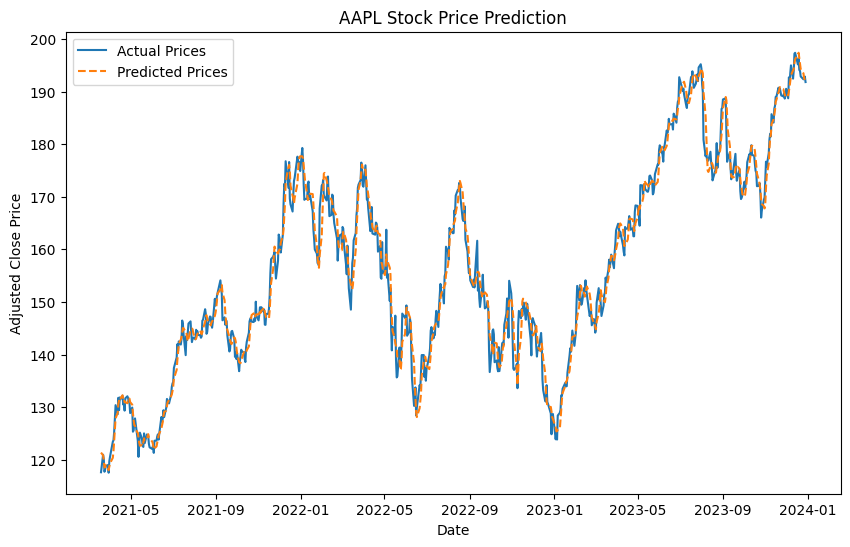

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data.index[-len(y_test):], y_test, label='Actual Prices')
plt.plot(data.index[-len(y_test):], y_pred, label='Predicted Prices', linestyle='dashed')
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()
